# SIMPLE LINEAR REGRESSION

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#### Importing the libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the data set 
### In this we will be importing the dataset from the link given and then we will be checking what are the columns associated

In [3]:
data = pd.read_csv("http://bit.ly/w-data")
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


### Lets plot out data and check the correlation of the points. Like how they are related to each other, are they strongly correlated or weakly correlated

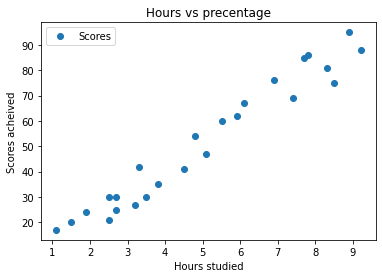

In [4]:
data.plot(x="Hours",y="Scores",style='o')
plt.title("Hours vs precentage")
plt.xlabel("Hours studied")
plt.ylabel("Scores acheived")
plt.show()

#### From the above graph this is clear that the points are strongly and positively correlated. since all the points are clustred together in a single space and secondly we can see that all the points approximately lie in the single line

### Now lets check the information if there is any NULL values. If there is no NULL values then lets seperate the Input variables(FEATURES) and Target.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### From above we can see that there is no null values. Because there are total 25 entries and in both the columns there are 25 Non-Null values
#### Lets seperate the Features and Target

In [6]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

#### Lets divide the dataset into training and testing

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

### Lets define a function which will use cross_val_score with evaluation matrix R-squared

In [22]:
from sklearn.model_selection import cross_val_score
def get_val_score(model):
    scores = cross_val_score(model,X_train,y_train,cv=5,scoring='r2')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
    

## Training the algorithm

### Now lets start training the dataset using the linear regression

In [23]:
from sklearn.linear_model import LinearRegression
#train the model
model = LinearRegression(n_jobs=10)
model.fit(X_train,y_train)

#get cross val score
get_val_score(model)

CV Mean:  0.9345411584974282
STD:  0.024761639345468385




### Lets plot a line uing the regressor and check how accurate is this

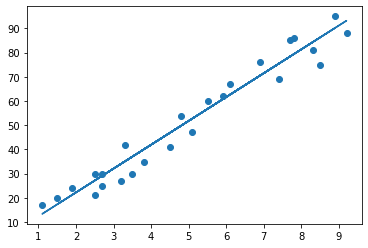

In [24]:
line = model.coef_*X+model.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

### Lets make some predictions

In [25]:
y_pred = model.predict(X_test)
print(y_pred)

[17.30220982 34.05529402 75.44526674]


In [26]:
df = pd.DataFrame({"Actual":y_test,"Prediction":y_pred})
df

,Actual,Prediction
0,20,17.302210
1,27,34.055294
2,69,75.445267


## Metrics for calculating Error

#### We know that accuracy is the most important entity for getting the performance of a model. But in case of **REGRESSION** accuracy is not possible so we try to minimize the errors. Hence, we calculate Error.

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_squared_error_metrics = mean_squared_error(y_test,y_pred)
RMSE = mean_squared_error(y_test,y_pred,squared=False)
mean_absolute_error_metrics = mean_absolute_error(y_test,y_pred)

print("Mean Squared Error: "+str(mean_squared_error_metrics))
print("Root mean squared error : "+str(RMSE))
print("Absolute Mean error: "+str(mean_absolute_error_metrics))


Mean Squared Error: 32.865569647342106
Root mean squared error : 5.732850045774972
Absolute Mean error: 5.3994503136120064
